In [0]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plot

def nn2na(NN):
    # Get every location where exist an arc:
    idxs = np.argwhere(NN)
    # Preallocate NA matrix, dimension is (nodes, arcs)
    NA = np.zeros([NN.shape[0], idxs.shape[0]]).astype(int)
    #C = np.zeros(NA.shape[1])
    # Loop in every arc, complete from (1) to (-1)
    for i, arc in enumerate(idxs):
        # Node arc:
        NA[arc[0], i] = 1 # From
        NA[arc[1], i] = -1 # To
    arc_idxs = [(arc[0], arc[1]) for arc in idxs]
    return NA, arc_idxs

# Shortest path Utils
def get_selected_arcs(arc_idxs, selected_arcs):
    arcs = []
    for index, value in enumerate(selected_arcs):
        if value > 0:
            arcs.append(arc_idxs[index])
    return arcs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.



## Results ## 


 Optimal Lambda:  0.3995


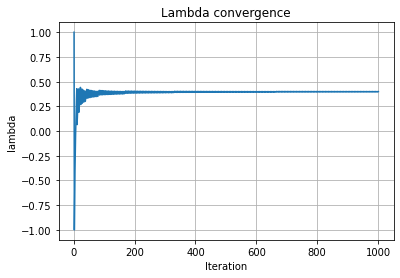


 Optimal Cost:  5.3985


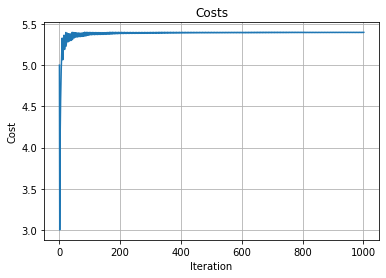

In [10]:
# IMPORT THE DATA:
NN = np.array([[0, 1, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0]])
# DATA MANIPULATION:
dist = np.array([2, 1, 2, 5, 2, 1, 2])
time = np.array([[3, 1, 3, 1, 3, 3, 5]]) 
beq = np.array([1, 0, 0, 0, 0, -1])
NA, arc_idxs = nn2na(NN)
bounds = tuple([(0, None) for arcs in range(0, NA.shape[1])])
total_time = 8

lambd = 0
tolerance = 0.001
iteration = 1
delta = 1

iteration = 1 
lambdas =[]
costs =[]
grads =[]
functions = []
iterations = []
while delta > tolerance:
    lag_dist = dist + time*lambd
    res = linprog(lag_dist, A_eq=NA, b_eq=beq, bounds=bounds, method='simplex')
    lagrange = res.fun - lambd * total_time
    grad = np.dot(time[0],res.x) - total_time
    step = 1 / iteration
    aux = lambd
    lambd = lambd + step * grad
    delta = abs(lambd - aux)    
    costs.append(lagrange)
    lambdas.append(lambd)
    grads.append(grad)
    iterations.append(iteration)
    iteration += 1

print("\n## Results ## \n")

print("\n Optimal Lambda: ", format(lambd,'.4f'))
plot.title('Lambda convergence')
plot.xlabel('Iteration')
plot.ylabel('lambda')
plot.grid()
plot.plot ( iterations, lambdas)
plot.show()

print("\n Optimal Cost: ",  format(lagrange,'.4f'))
plot.title('Costs')
plot.xlabel('Iteration')
plot.ylabel('Cost')
plot.grid()
plot.plot ( iterations, costs)
plot.show()
